In [1]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 2060
Using device: cuda


In [2]:
import pandas as pd
import numpy as np
import mne
import os
import matplotlib.pyplot as plt

In [3]:
from eeg_lib.commons.constant import DATASETS_FOLDER
from eeg_lib.data.data_loader.EEGDataExtractor import EEGDataExtractor
from eeg_lib.models.similarity.centroids import SimilarityCentroidsVerifier

In [4]:
DATA_DIR = f"{DATASETS_FOLDER}/Kolory/"

extractor = EEGDataExtractor(data_dir=DATA_DIR)
eeg_df, participants_info = extractor.extract_dataframe()

Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/011595b1@1651.fif...
    Range : 0 ... 207624 =      0.000 ...   830.496 secs
Ready.
Reading 0 ... 207624  =      0.000 ...   830.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/011595b1@1651.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/022e8467@1910.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)


C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/06f240e9@1215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded 

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/25d0bdb3@1318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/2718372d@1400.fif...


C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/2718372d@1400.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 206649 =      0.000 ...   826.596 secs
Ready.
Reading 0 ... 206649  =      0.000 ...   826.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/2882ae26@1441.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/3033b74a@1626.fif...
    Range : 0

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/3033b74a@1626.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/36eea4bb@1519.fif...
    Range : 0

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/36eea4bb@1519.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/39285860@1825.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/446b3735@1618.fif...
    Range : 0

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/446b3735@1618.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded 

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/46607ce4@1717.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif...
    Range : 0

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/541c91f2@1456.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidt

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/548fd734@1628.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 s

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/54e60118@1339.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidt

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/6d9a8b86@1613.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/6e542bc2@0845.fif...
    Range : 0

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/6e542bc2@0845.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/8bd3032e@1746.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidt

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/8dca0725@1418.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/90441f44@1643.fif...
    Range : 0

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/90441f44@1643.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activate

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/9e8bae0e@1828.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/K

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/b34b1427@0906.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidt

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/bf2d2193@1638.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif...
    Range : 0 ... 201699 =      0.000 ...   806.796 secs

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/e08138e2@1731.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/e283301e@1606.fif...
    Range : 0 ... 219424 =      0.000 ...   877.696 secs

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/e283301e@1606.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/e43a9f9f@0941.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/f82b5699@1757.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif...
    Range : 0

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/ffae50df@1712.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped


In [5]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from eeg_lib.data.ProxyDataset import ProxyDataset
from eeg_lib.models.verification.EEGnet import EmbeddingEEGNet
from eeg_lib.losses.ProxyNCALoss import ProxyNCALoss
from eeg_lib.utils.visualisations import plot_tsne
from eeg_lib.utils.visualisations import create_handles
from eeg_lib.utils.helpers import split_train_test

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler

In [6]:
from torch.utils.tensorboard import SummaryWriter

In [7]:
writer = SummaryWriter(log_dir='runs/eegnet')

In [8]:
eeg_df.head()

,participant_id,epoch,label
0,011595b1@1651,"[[1.5994905899983496e-06, 4.660259780289654e-0...",gray
1,011595b1@1651,"[[3.2936710911247503e-06, 3.745427511069207e-0...",green
2,011595b1@1651,"[[4.327731927482567e-06, 2.515285592381088e-06...",gray
3,011595b1@1651,"[[1.7759480686267016e-06, -3.0099938072414544e...",red
4,011595b1@1651,"[[4.0924612078715145e-06, 4.532130983695527e-0...",gray


In [9]:
X_train, X_test, y_train, y_test = split_train_test(
    eeg_df=eeg_df, test_size=0.20, random_state=42
)

Training set participants: ['fd8a3308@1135' 'e08138e2@1731' '541c91f2@1456' '011595b1@1651'
 '2718372d@1400' '6e542bc2@0845' '2882ae26@1441' '548fd734@1628'
 '51ec2c20@0923' 'bf2d2193@1638' '022e8467@1910' '06f240e9@1215'
 'e283301e@1606' '25d0bdb3@1318' 'b34b1427@0906' 'e43a9f9f@0941'
 '8dca0725@1418' 'ffae50df@1712' '9e8bae0e@1828' '36eea4bb@1519'
 '46607ce4@1717' '54e60118@1339' '90441f44@1643' '3033b74a@1626']
Test set participants: ['f82b5699@1757' '6d9a8b86@1613' 'd87e1bd3@1806' '8bd3032e@1746'
 '39285860@1825' '446b3735@1618']
Training labels: ['011595b1@1651' '022e8467@1910' '06f240e9@1215' '25d0bdb3@1318'
 '2718372d@1400' '2882ae26@1441' '3033b74a@1626' '36eea4bb@1519'
 '46607ce4@1717' '51ec2c20@0923' '541c91f2@1456' '548fd734@1628'
 '54e60118@1339' '6e542bc2@0845' '8dca0725@1418' '90441f44@1643'
 '9e8bae0e@1828' 'b34b1427@0906' 'bf2d2193@1638' 'e08138e2@1731'
 'e283301e@1606' 'e43a9f9f@0941' 'fd8a3308@1135' 'ffae50df@1712']
Test labels: ['39285860@1825' '446b3735@1618' '6d9a8

In [10]:
le_train = LabelEncoder()
le_train.fit(y_train)
y_train_encoded = le_train.transform(y_train)

le_test = LabelEncoder()
le_test.fit(y_test)
y_test_encoded = le_test.transform(y_test)

In [11]:
batch_size = 16
num_epochs = 15
learning_rate = 0.01

In [12]:
dataset = ProxyDataset(X_train,y_train_encoded)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

24


In [13]:
model = EmbeddingEEGNet(cnn_temp_filt=16,cnn_separable_size=32).to(device)
proxy_loss_fn = ProxyNCALoss(len(np.unique(y_train_encoded)),32).to(device)

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\losses\ProxyNCALoss.py:10: FutureWarning: `nn.init.kaiming_normal` is now deprecated in favor of `nn.init.kaiming_normal_`.
  nn.init.kaiming_normal(self.proxies.weight, mode='fan_out')


In [14]:
epoch_shape = np.array(X_train[0]).shape

In [15]:
epoch_shape

(4, 751)

In [16]:
sample_input = torch.randn(1, 1, epoch_shape[0], epoch_shape[1]).to(device)
writer.add_graph(model, sample_input)

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\venv\Lib\site-packages\torch\nn\modules\conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv2d(


In [17]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
training_centroid_verifier = SimilarityCentroidsVerifier()

In [19]:
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_acc = 0
    counter = 0
    for data, label in dataloader:
        # print(data.shape)
        data = data.to(device)
        label = label.to(device).long()
        optimizer.zero_grad()
        data_embedd = model(data)
        training_centroid_verifier.update_centroids(data_embedd, label)
        classified = training_centroid_verifier.classify_batch(data_embedd)
        
        i = 0
        for l in classified:
            counter+=1
            if l[0] == label[i]:
                epoch_acc += 1
            i += 1
        
        loss = proxy_loss_fn(data_embedd, label)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            w = model.cnnDepth.weight
            norm = w.norm(2, dim=0, keepdim=True).clamp(min=0.5)
            desired = torch.clamp(norm, max=1.0)
            model.cnnDepth.weight.copy_(w * (desired / norm))
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(dataloader)
    avg_acc  = epoch_acc / (len(dataloader) * batch_size)
    epoch_acc = epoch_acc/ (len(dataloader)*batch_size)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")
    print(f"Epoch {epoch+1}/{num_epochs}, Accuracy: {epoch_acc}")
    writer.add_scalar('Loss/train', avg_loss, epoch)
    writer.add_scalar('Accuracy/train', avg_acc, epoch)

Epoch 1/15, Loss: 1054.5375559329987
Epoch 1/15, Accuracy: 0.2350933908045977
Epoch 2/15, Loss: 1022.0024378299713
Epoch 2/15, Accuracy: 0.3288433908045977
Epoch 3/15, Loss: 1003.6328113079071
Epoch 3/15, Accuracy: 0.414691091954023
Epoch 4/15, Loss: 981.6637489795685
Epoch 4/15, Accuracy: 0.5195761494252874
Epoch 5/15, Loss: 963.3750052452087
Epoch 5/15, Accuracy: 0.6133261494252874
Epoch 6/15, Loss: 951.5847404003143
Epoch 6/15, Accuracy: 0.6672054597701149
Epoch 7/15, Loss: 941.6530644893646
Epoch 7/15, Accuracy: 0.6964798850574713
Epoch 8/15, Loss: 935.5229244232178
Epoch 8/15, Accuracy: 0.717492816091954
Epoch 9/15, Loss: 931.0413093566895
Epoch 9/15, Accuracy: 0.7332974137931034
Epoch 10/15, Loss: 926.9214091300964
Epoch 10/15, Accuracy: 0.7437140804597702
Epoch 11/15, Loss: 921.6312725543976
Epoch 11/15, Accuracy: 0.7609554597701149
Epoch 12/15, Loss: 920.7643291950226
Epoch 12/15, Accuracy: 0.7631106321839081
Epoch 13/15, Loss: 918.0808651447296
Epoch 13/15, Accuracy: 0.7724497

In [20]:
model.to('cpu')

EmbeddingEEGNet(
  (cnnTemp): Conv2d(1, 16, kernel_size=(1, 64), stride=(1, 1), padding=same)
  (batchNorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnnDepth): Conv2d(16, 32, kernel_size=(2, 1), stride=(1, 1), padding=valid)
  (batchNorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgPool1): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
  (dropout1): Dropout(p=0.5, inplace=False)
  (cnnSeparable): Conv2d(32, 32, kernel_size=(1, 32), stride=(1, 1), padding=same)
  (batchNorm3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgPool2): AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0)
  (dropout2): Dropout(p=0.5, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2208, out_features=32, bias=True)
  (elu): ELU(alpha=1.0)
)

In [21]:
embeddings = []

In [22]:
with torch.no_grad():
    for epoch in X_train:
        embeddings.append(model(torch.tensor(epoch, dtype=torch.float, requires_grad=False).unsqueeze(0).unsqueeze(0)))

In [23]:
test_embeddings = []

In [24]:
with torch.no_grad():
    for epoch in X_test:
        test_embeddings.append(model(torch.tensor(epoch, dtype=torch.float, requires_grad=False).unsqueeze(0).unsqueeze(0)))

## Visualization

In [25]:
tsne = TSNE(n_components=2, random_state=42)

In [26]:
embd = torch.stack(embeddings).reshape((np.array(embeddings).shape[0],32)).numpy()

In [27]:
embd_test = torch.stack(test_embeddings).reshape((1392,32)).numpy()

In [28]:
combined_embeddings = np.concatenate((embd, embd_test), axis=0)

In [29]:
reduced_combined = tsne.fit_transform(combined_embeddings)

In [30]:
train_reduced = reduced_combined[:embd.shape[0]]
test_reduced = reduced_combined[embd.shape[0]:]

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
train_reduced_normalized = scaler.fit_transform(train_reduced)
test_reduced_normalized = scaler.transform(test_reduced)

In [32]:
custom_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
                 '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
                 '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
                 '#000075', '#808080', '#ffffff', '#000000', '#a9a9a9', '#ff69b4',
                 '#b0e0e6', '#32cd32', '#ff4500', '#da70d6', '#ff1493', '#7fffd4']
cmap = ListedColormap(custom_colors[:30])

In [33]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)

In [34]:
train_handles = create_handles(y_train, cmap)

In [35]:
test_handles = create_handles(y_test, plt.get_cmap('tab10'))

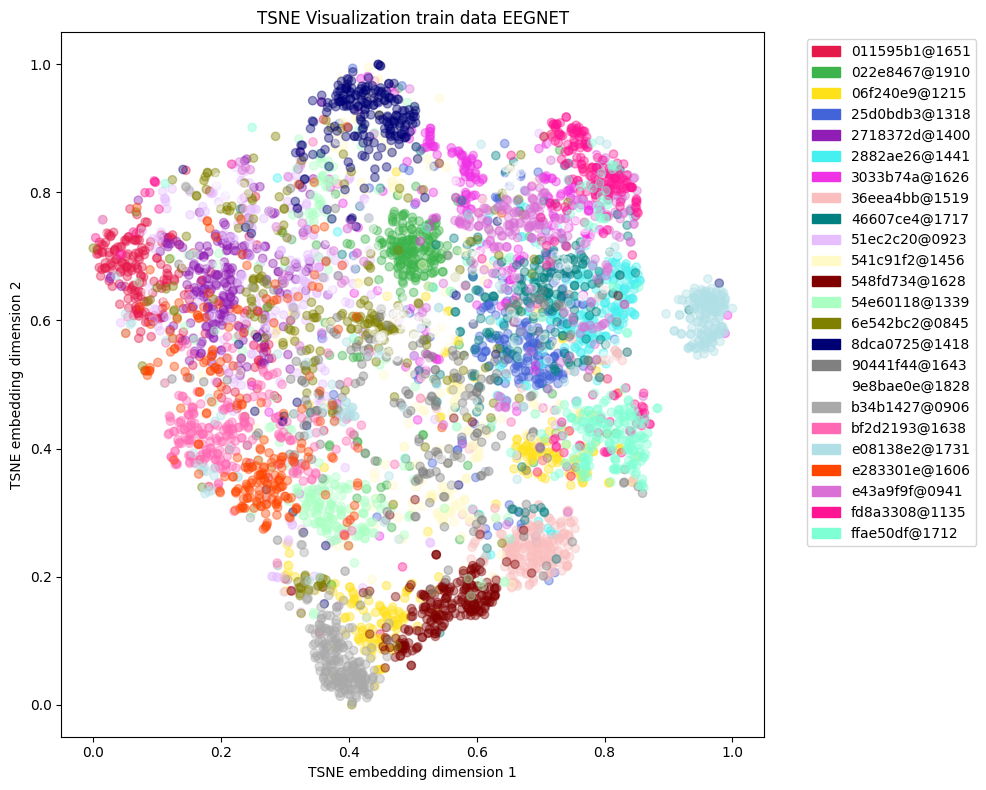

In [36]:
fig = plot_tsne(train_reduced_normalized,
          cmap,
          y_train_encoded,
          handles=train_handles,
          alpha=0.4,
          title="TSNE Visualization train data EEGNET",
          xlabel="TSNE embedding dimension 1",
          ylabel="TSNE embedding dimension 2",
          centroids=None,
          return_fig=True)

In [37]:
writer.add_figure('EEGNet_train_TSNE', fig, global_step=0)

In [38]:
fig = plot_tsne(
    test_reduced_normalized,
    "tab10",
    y_test_encoded,
    handles=test_handles,
    alpha=0.7,
    title="TSNE Visualization EEGNET test data",
    xlabel="TSNE embedding dimension 1",
    ylabel="TSNE embedding dimension 2",
    centroids=None,
    return_fig=True
)
writer.add_figure('EEGNet_test_TSNE', fig, global_step=0)

In [39]:
writer.close()

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
train_normalized = scaler.fit_transform(embd)
test_normalized = scaler.transform(embd_test)

In [41]:
centroid_verifier_actual = SimilarityCentroidsVerifier()

In [42]:
centroid_verifier_actual.compute_true_centroids(y_train_encoded, train_normalized)

{0: array([0.5712215 , 0.76979107, 0.6664047 , 0.60557616, 0.5233323 ,
        0.5941528 , 0.45695838, 0.39950594, 0.48920104, 0.5400377 ,
        0.3947512 , 0.32527235, 0.49141   , 0.7360515 , 0.4339548 ,
        0.75031537, 0.23629636, 0.34357527, 0.6185164 , 0.24642743,
        0.67263615, 0.67766225, 0.34651703, 0.52669185, 0.7086326 ,
        0.5179681 , 0.49525544, 0.65240026, 0.7606716 , 0.5289146 ,
        0.5833361 , 0.70669913], dtype=float32),
 1: array([0.58733386, 0.5354475 , 0.6246189 , 0.5705828 , 0.5796842 ,
        0.52747345, 0.31208324, 0.50126123, 0.5214743 , 0.32225126,
        0.29066184, 0.628965  , 0.66525126, 0.38647267, 0.49704167,
        0.5739218 , 0.33641517, 0.6485075 , 0.5072817 , 0.52788466,
        0.4325784 , 0.535926  , 0.41455075, 0.3394024 , 0.494705  ,
        0.5908535 , 0.38968408, 0.6607271 , 0.55449384, 0.50906575,
        0.5047485 , 0.7362376 ], dtype=float32),
 2: array([0.4061092 , 0.6132357 , 0.60453606, 0.39285907, 0.55284303,
        0

In [43]:
acc = 0
for i in range(len(train_normalized)):
    true_label = y_train_encoded[i]
    predicted_label, _ = centroid_verifier_actual.classify_embedding(train_normalized[i])
    if predicted_label == true_label:
        acc += 1
acc = acc/len(train_normalized)

In [44]:
acc

0.6517600574712644